# PCA and other exploration of features

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('filtered_feature_df.csv')
df = df.iloc[:, 3:]

In [62]:
feature_list = df.columns[:-2]

In [81]:
len(feature_list)

71

In [67]:
X = pd.get_dummies(df[features]).values

In [138]:
y = df['miRNA'].values

In [143]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [144]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_std)

Text(0.05, 0.9, 'explained variance ratios:\n[0.0608, 0.046]')

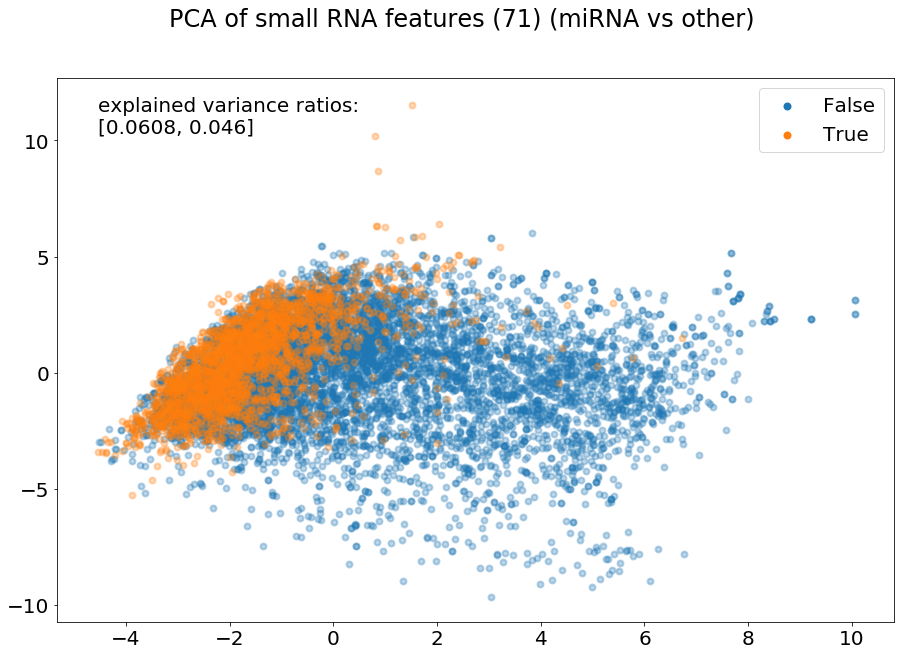

In [145]:
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(15, 10))
# plt.figure(figsize=(15, 10))
colors = ["navy", "turquoise", "darkorange", 'red', 'green', 'tab:blue']
colors_two = ['tab:blue', 'tab:orange']
lw = 2

for color, label in zip(colors_two, set(y)):
    ax.scatter(
        X_r[y == label, 0], X_r[y == label, 1], color=color, alpha=0.3, lw=lw, label=label
    )
leg = ax.legend(loc="upper right", shadow=False, scatterpoints=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
fig.suptitle("PCA of small RNA features (71) (miRNA vs other)");
explained_variance_ratio_string = \
'explained variance ratios:\n{ratios}'.format(ratios=[round(ratio, 4) for ratio in pca.explained_variance_ratio_])
ax.text(0.05, .9, explained_variance_ratio_string, transform=ax.transAxes)

# plt.text(5, -2, 
#     "explained variance ratio (first two components): %s"
#     % str(pca.explained_variance_ratio_)
# )